In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

### Create either a python script or a jupyter notebook named explore_tips that explores the tips data set that is built in to seaborn. Perform at least 1 t-test and 1 chi square test.



In [2]:
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
# Tools to knead the data bread

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Stats stuff

from math import sqrt
from scipy import stats


# Mas Viz

from sklearn.model_selection import learning_curve


#### Split the data to start playing with the training set

In [6]:
train, test = train_test_split(df, random_state=123)

In [7]:
train.head()

,total_bill,tip,sex,smoker,day,time,size
54,25.56,4.34,Male,No,Sun,Dinner,4
160,21.50,3.50,Male,No,Sun,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
72,26.86,3.14,Female,Yes,Sat,Dinner,2
143,27.05,5.00,Female,No,Thur,Lunch,6


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 54 to 109
Data columns (total 7 columns):
total_bill    183 non-null float64
tip           183 non-null float64
sex           183 non-null category
smoker        183 non-null category
day           183 non-null category
time          183 non-null category
size          183 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 6.9 KB


#### $H_0$: There is no difference between genders when it comes to tip amount
#### $H_a$: There IS a difference between genders when it comes to tip amount

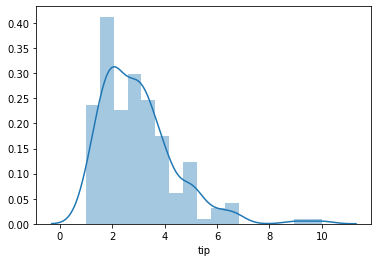

In [9]:
# Show tip distribution:

sns.distplot(train.tip)

#### Pretty normal right_tailed distribution

In [10]:
train.tip.mean(), train.tip.median()

(2.987978142076503, 2.83)

In [11]:
men_win = train[train.sex == "Male"]

u = train.tip.mean()

xbar = men_win.tip.mean()

s = men_win.tip.std()

# n = men_win.shape[0]  - '.shape[0]' info: if I said 'df.shape[n, m],'
# pandas would return to me the shape of the data with 'n' = number of rows
# and 'm' = the number of columns.  So when I type '.shape[0],' I'm asking pandas
# to use / return the number of rows.

n = men_win.shape[0]

degf = n - 1

standard_error = s / sqrt(n)

t = (xbar - u) / (s / sqrt(n))

t

0.7443196446647449

In [12]:
# p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

p = stats.t(degf).sf(t)

# p

p

0.2290877250136097

In [13]:
print(f'T-Stat = {t:.3f}')
print(f'p-Value = {p:.3f}')

T-Stat = 0.744
p-Value = 0.229


#### High p-value indicates we can disprove our null hypothesis (assuming alpha of .05).  Therefore we go with the alternative hypothesis: there IS a dfference between genders when it comes to tip amoun

### Chi-Square

- $H_0$ Men smoke just as much as women
- $H_a$ Men smoke MORE or LESS than women

In [14]:
train.head()

,total_bill,tip,sex,smoker,day,time,size
54,25.56,4.34,Male,No,Sun,Dinner,4
160,21.50,3.50,Male,No,Sun,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
72,26.86,3.14,Female,Yes,Sat,Dinner,2
143,27.05,5.00,Female,No,Thur,Lunch,6


In [15]:
n = train.shape[0] # '.shape()' is in (rows, columns) format. 
                   # rows = 'axis=0', columns = 'axis=1' 
                   # So by putting 0 in brackets, I'm telling pandas 
                   # assing 'n' the number of rows in the train df

n

183

In [16]:
smoker_proportions = train.smoker.value_counts() / n
smoker_proportions

No     0.617486
Yes    0.382514
Name: smoker, dtype: float64

#### So 38.25% of the train df smokes, and 61.75% does NOT smoke

In [17]:
gender_proportions = train.sex.value_counts() / n
gender_proportions

Male      0.644809
Female    0.355191
Name: sex, dtype: float64

#### And roughly 64.48% of the train data is men, 35.52% of the train data is women.

#### To get the expected percentages of men and women who are smokers:

In [18]:
# Loop creates a df called 'expected'.
# '.iteritems()' iterates over all the combination pairs of 'smoker' and 'gender'

expected = pd.DataFrame()

for smoker_group, s_prop in smoker_proportions.iteritems():
    for gender_group, g_prop in gender_proportions.iteritems():
        expected.loc[gender_group, smoker_group] = s_prop * g_prop
            #.loc takes all the rows and columns of a label (s_prop and g_prop) and,
            # in this case, multiplies them.
expected.sort_index(inplace=True)
expected

,No,Yes
Female,0.219326,0.135866
Male,0.398161,0.246648


#### So looks like of all the people in the train df, we expect 14% of the women to be smokers, and 25% of the men to be smokers.

#### Let's convert that to numers:

In [19]:
expected *= n
expected

,No,Yes
Female,40.136612,24.863388
Male,72.863388,45.136612


#### Now that we have our expected proportions, we have to get our observed proportions so we can compare the two:

In [25]:
observed = pd.crosstab(train.sex, train.smoker)
observed

smoker,Yes,No
sex,,
Male,43,75
Female,27,38


#### So there's what we actually observed.  Now we can compare the two using chi_square:

In [21]:
chi_square = ((observed - expected)**2 / expected).values.sum()
chi_square

0.46113995948554287

#### Now I have to get the degrees of freedom.  Degrees of freedom are n-1, but that's n-1 for a row AND n-1 for a column.  Recall that 'observed' is now that df we created with the crosstab a couple of steps ago.

In [22]:
nrows, ncols = observed.shape # recall '.shape' gives you 'row #s, col #s' in that format

deg_of_freedom = (nrows - 1) * (ncols-1)

deg_of_freedom


1

#### To complete, multiply 'chi_square' by 'deg_of_freedom' and tie the survivor function to it because we have the values but need the probability.  Also, using scipy's pre-calculated p-value for the calculation: 

In [23]:
stats.chi2(deg_of_freedom).sf(chi_square)

0.49709169301015554

#### This p-value is high.  Typically it's .05, and here we're looking at 10 TIMES that.  Because of this high p-value, we fail to reject (or, just flat-out reject) the null hypothesis, and are therefore led to the conclusion that a higher percentage of women than men smoke, at least in this dataset

#### Scale to keep perspective ('dollars' and 'pounds', 'chips' and 'fries' are all the same):

In [9]:
scaler = MinMaxScaler()
num_vars = list(train.select_dtypes('number').columns)

print('Scaling {}, and {}...'.format(', '.join(num_vars[:-1]), num_vars[-1]))
train[num_vars] = scaler.fit_transform(train[num_vars])

Scaling total_bill, tip, and size...


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [10]:
# look for a max of 1 for each variable and a minimum of 0

train.describe()

,total_bill,tip,size
count,183.000000,183.000000,183.000000
mean,0.346241,0.220886,0.311475
std,0.184465,0.159592,0.192809
min,0.000000,0.000000,0.000000
25%,0.215019,0.111111,0.200000
50%,0.308127,0.203333,0.200000
75%,0.439150,0.286111,0.400000
max,1.000000,1.000000,1.000000


#### Time to visualize some stuff (now that we've scaled, proportions will be consistent).

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/anaconda3/lib/python3.7/site-package

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125c3b7d0>,
      dtype=object)

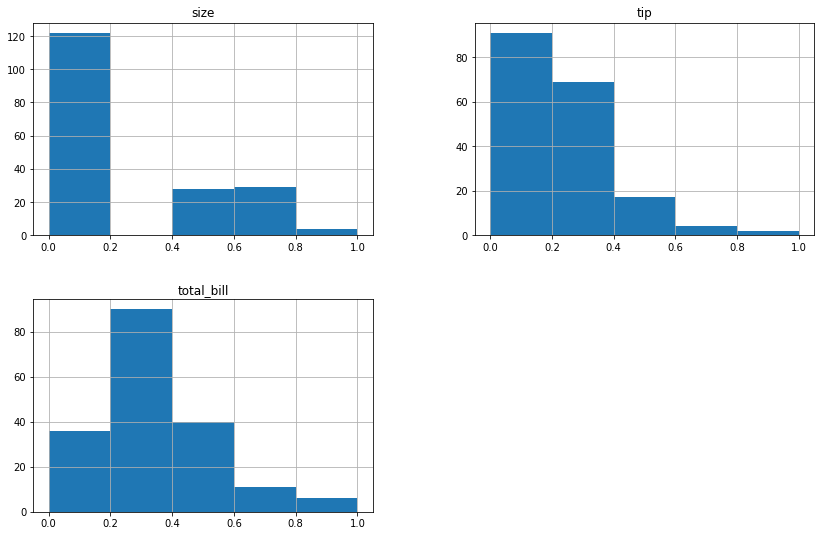

In [11]:
train.hist(figsize=(14, 9), bins = 5, log = False)